In this notebook i wanted to demonstrate the process of analyzing semantic relationships between phrases using a graph-based approach. The phrases are taken from a poem.

###**Phrase Embedding and Similarity Calculation**
Using a pre-trained Sentence-BERT (SBERT) model, the phrases are transformed into embeddings—numerical vectors that capture their semantic meaning. Cosine similarity is then used to measure the degree of similarity between each pair of phrases. This allows for quantifying how closely the phrases are related in meaning.

###**Graph Construction**
Two types of graphs are built:

An unweighted graph for computing centrality measures based on simple connections between phrases.
A weighted graph where the edge weights represent the cosine similarity between the phrases, capturing the strength of their semantic connections.

###**Centrality and Semantic Strength Analysis**
Centrality measures such as degree, betweenness, closeness, and eigenvector centrality are calculated on the unweighted graph to identify the most influential phrases. The weighted graph is used to compute each phrase’s total semantic strength by summing the edge weights, allowing for an analysis of how central or isolated a phrase is in terms of meaning.

###**Visualization**
The notebook includes a visualization of the semantic graph, with nodes colored to represent their semantic strength, offering an intuitive way to observe the relationships between phrases.

####**Installing Required Libraries**
This cell installs the necessary libraries, including sentence-transformers, networkx, matplotlib, pandas, and scikit-learn. These libraries are used for semantic analysis, graph creation, and visualization.

In [1]:
!pip install sentence-transformers networkx matplotlib pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 2.8 MB/s eta 0:00:00


Importing Libraries
In this step, the required libraries for working with graphs, performing semantic analysis, and handling data are imported.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.colors as mcolors
import pandas as pd

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


####**Defining Phrases from the Poem**
Here, the phrases from the poem are defined as a list. These phrases will be processed later for similarity analysis.

In [3]:
phrases = [
    "Images", "I choose", "Within society’s turmoils",
    "Forming words", "Connecting", "To my perplexed self",
    "In my thoughts", "Through love", "I seek my soul"
]

####**Loading Pre-trained SBERT Model**
This step loads a pre-trained Sentence-BERT (SBERT) model called all-MiniLM-L6-v2 to encode the phrases into embeddings. SBERT is used for sentence-level embeddings and is useful for computing similarity between sentences.

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

####**Generating Embeddings for Each Phrase**
The SBERT model is used to generate embeddings for each phrase. Embeddings are numerical representations of the phrases in a high-dimensional space.

In [5]:
embeddings = model.encode(phrases)

####**Computing Cosine Similarity Between Phrases**
Here, cosine similarity is calculated between the phrase embeddings to measure how semantically similar each pair of phrases is. The results are stored in a similarity matrix.

In [6]:
similarity_matrix = cosine_similarity(embeddings)

####**Creating an Unweighted Graph for Centrality**
In this step, an unweighted graph is created using the phrases as nodes. Every pair of phrases is connected with an edge to allow centrality measures to be calculated.

In [7]:
G_centrality = nx.Graph()
G_centrality.add_nodes_from(phrases)
for i in range(len(phrases)):
    for j in range(i + 1, len(phrases)):
        G_centrality.add_edge(phrases[i], phrases[j])

####**Creating a Weighted Graph for Semantic Similarities**
A weighted graph is created based on the cosine similarities between phrases. Each edge weight is scaled to the range [0, 1], with stronger similarities receiving higher weights.

In [8]:
G_semantics = nx.Graph()
G_semantics.add_nodes_from(phrases)
for i, phrase1 in enumerate(phrases):
    for j, phrase2 in enumerate(phrases):
        if i != j:
            G_semantics.add_edge(phrase1, phrase2, weight=(similarity_matrix[i][j] + 1) / 2)


####**Calculating Centrality Measures (Unweighted Graph)**
Various centrality measures are calculated for the unweighted graph: degree centrality, betweenness centrality, closeness centrality, and eigenvector centrality. These metrics help identify the most central phrases in terms of connectivity.

In [9]:
degree_centrality = nx.degree_centrality(G_centrality)
betweenness_centrality = nx.betweenness_centrality(G_centrality)
closeness_centrality = nx.closeness_centrality(G_centrality)
eigenvector_centrality = nx.eigenvector_centrality(G_centrality)

centrality_df = pd.DataFrame({
    "Phrase": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Closeness Centrality": list(closeness_centrality.values()),
    "Eigenvector Centrality": list(eigenvector_centrality.values())
})

####**Computing Total Semantic Strength (Weighted Graph)**
The total semantic strength of each node is calculated as the sum of the weights of all edges connected to that node. This gives an overall measure of how strongly a phrase is semantically connected to the others.

In [10]:
total_semantic_strength = {}
for node in G_semantics.nodes():
    total_weight = sum(G_semantics[node][neighbor]['weight'] for neighbor in G_semantics.neighbors(node))
    total_semantic_strength[node] = total_weight

####**Sorting Nodes by Semantic Strength**
The phrases (nodes) are sorted based on their total semantic strength in ascending order.

In [11]:
sorted_nodes = sorted(total_semantic_strength.items(), key=lambda x: x[1])

####**Creating a Color Gradient Based on Semantic Strength**
A color gradient from yellow (weakest) to red (strongest) is created and applied to the nodes based on their ranking by total semantic strength.

In [12]:
colors = list(mcolors.LinearSegmentedColormap.from_list("RedYellow", ["yellow", "red"])(np.linspace(0, 1, len(sorted_nodes))))
node_color_map = {sorted_nodes[i][0]: colors[i] for i in range(len(sorted_nodes))}
node_colors = [node_color_map[node] for node in G_semantics.nodes()]

####**Plotting the Semantic Similarity Graph**
The semantic similarity graph is visualized with nodes colored according to their semantic strength. The poem's text is displayed as the title, and the graph's legend shows node weights in ascending order.

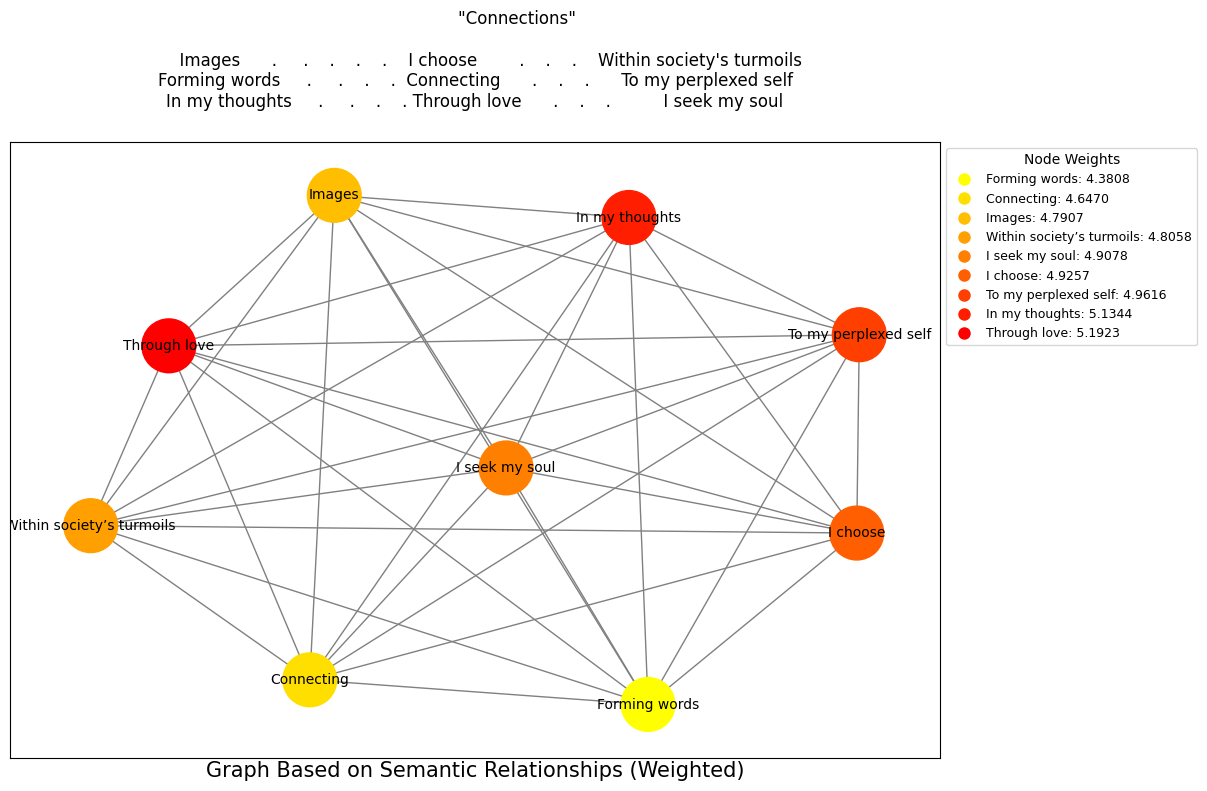

In [13]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_semantics, k=0.5)

nx.draw_networkx_nodes(G_semantics, pos, node_size=1500, node_color=node_colors)
nx.draw_networkx_edges(G_semantics, pos, width=1, edge_color="gray")
nx.draw_networkx_labels(G_semantics, pos, font_size=10, font_color="black")

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=f'{node}: {total_semantic_strength[node]:.4f}',
                markerfacecolor=node_color_map[node], markersize=10)
    for node, strength in sorted_nodes
]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), title="Node Weights", fontsize=9)

poem_text = """\
                "Connections"

      Images      .     .    .    .    .    I choose        .    .    .    Within society's turmoils
Forming words     .     .    .    .  Connecting      .    .    .      To my perplexed self
In my thoughts     .     .    .    . Through love      .    .    .          I seek my soul"""
plt.text(0.5, 1.05, poem_text, fontsize=12, ha='center', va='bottom', transform=plt.gca().transAxes)

plt.text(0.5, -0.005, "Graph Based on Semantic Relationships (Weighted)", fontsize=15, ha='center', va='top', transform=plt.gca().transAxes)

plt.show()


####**Displaying Centrality Measures**
The centrality measures for each phrase are printed. These provide insights into the most important phrases in terms of the graph structure.

In [14]:
print("\nCentrality Measures (Unweighted):")
print(centrality_df.to_string(index=False))


Centrality Measures (Unweighted):
                   Phrase  Degree Centrality  Betweenness Centrality  Closeness Centrality  Eigenvector Centrality
                   Images                1.0                     0.0                   1.0                0.333333
                 I choose                1.0                     0.0                   1.0                0.333333
Within society’s turmoils                1.0                     0.0                   1.0                0.333333
            Forming words                1.0                     0.0                   1.0                0.333333
               Connecting                1.0                     0.0                   1.0                0.333333
     To my perplexed self                1.0                     0.0                   1.0                0.333333
           In my thoughts                1.0                     0.0                   1.0                0.333333
             Through love                1.0 

####**Displaying Top 4 Strongest and Weakest Semantic Edges**
The top 4 strongest and bottom 4 weakest semantic relationships (edges) between phrases are identified and printed based on their cosine similarity.

In [15]:
edges_with_weights = [(u, v, d['weight']) for u, v, d in G_semantics.edges(data=True)]
sorted_edges = sorted(edges_with_weights, key=lambda x: x[2], reverse=True)
top_4_edges = sorted_edges[:4]
bottom_4_edges = sorted_edges[-4:]

print("\nTop 4 Strongest Semantic Edges (Cosine Similarity):")
for edge in top_4_edges:
    print(f"{edge[0]} ↔ {edge[1]}: Cosine Similarity = {edge[2]:.4f}")

print("\nBottom 4 Weakest Semantic Edges (Cosine Similarity):")
for edge in bottom_4_edges:
    print(f"{edge[0]} ↔ {edge[1]}: Cosine Similarity = {edge[2]:.4f}")


Top 4 Strongest Semantic Edges (Cosine Similarity):
In my thoughts ↔ Through love: Cosine Similarity = 0.7080
To my perplexed self ↔ In my thoughts: Cosine Similarity = 0.6906
I choose ↔ In my thoughts: Cosine Similarity = 0.6873
Within society’s turmoils ↔ Through love: Cosine Similarity = 0.6849

Bottom 4 Weakest Semantic Edges (Cosine Similarity):
Forming words ↔ Connecting: Cosine Similarity = 0.5511
I choose ↔ Forming words: Cosine Similarity = 0.5394
Forming words ↔ To my perplexed self: Cosine Similarity = 0.5344
Forming words ↔ I seek my soul: Cosine Similarity = 0.4984


####**Displaying Total Semantic Strength of Each Node**
Finally, the total semantic strength for each node is displayed in ascending order.

In [16]:
print("\nTotal Semantic Strength (Sum of Cosine Similarities) for each Node:")
for node, strength in sorted_nodes:
    print(f"{node}: {strength:.4f}")


Total Semantic Strength (Sum of Cosine Similarities) for each Node:
Forming words: 4.3808
Connecting: 4.6470
Images: 4.7907
Within society’s turmoils: 4.8058
I seek my soul: 4.9078
I choose: 4.9257
To my perplexed self: 4.9616
In my thoughts: 5.1344
Through love: 5.1923


##**Conclusion**
This analysis provides valuable insights into the semantic relationships between the phrases of the poem by employing both centrality and similarity measures within a graph-based framework.

###**Centrality Measures: Influence of Phrases**
The unweighted graph's centrality measures (degree, betweenness, closeness, and eigenvector centrality) reveal the most influential phrases in the context of the entire network. For instance, phrases with high degree centrality are connected to many others, indicating they play a central role in bridging the overall meaning. Betweenness centrality highlights phrases that serve as key connectors between different clusters, while eigenvector centrality identifies those that are connected to other highly influential phrases. These metrics collectively show how each phrase functions in the network, regardless of the specific meaning.

###**Semantic Strength: Measuring Meaningful Connections**
The weighted graph provides a more granular perspective by assigning weights based on cosine similarity, reflecting the semantic closeness between phrases. By summing the weights of edges connected to each phrase, we obtain each phrase's total semantic strength. Phrases with higher semantic strength are more strongly linked to others in terms of meaning, indicating that they capture essential themes or ideas in the poem. Conversely, phrases with lower semantic strength are less connected, potentially representing more unique or isolated concepts.

###**Visualization: Semantic Structure of the Poem**
The visual representation of the semantic similarity graph highlights how the poem’s phrases interact. Phrases with higher semantic strength are colored in deeper shades, making it easy to identify the key semantic hubs in the poem. This visual tool aids in understanding the poem’s thematic structure, as it shows the distribution of meaning across phrases.

Overall, this method provides a powerful way to analyze textual content, revealing not only which elements are central or influential but also how closely related they are in meaning. This approach could be extended to larger texts or adapted for use in natural language processing (NLP) tasks such as document clustering, summarization, or topic modeling.